О записях в этом ноутбуке:
- прежде чем строить модели ML, на этапе EDA опеределим значимые признаки(при выборе значимых признаков - мы уменьшим размерность задачи)
- Определим метод работы с несбалансированными данными.
- Построим все 4 модели ML, в каждой вычислим метрики - далее сравним все 4 модели ML, затем выберем лучшую и продолжим её оптимизацию.

In [3]:
# Проведем EDA для датасета diabetes.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diabetes.csv')

print(df.head())
print("-------------------------------------------------")
print(df.describe())
print("-------------------------------------------------")
print(df.info())

# Pregnancies - Беременности
# SkinThickness - Толщина кожи
# BMI - Индекс массы тела
# DiabetesPedigreeFunction - генетический риск развития сахарного диабета


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
-------------------------------------------------
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.9

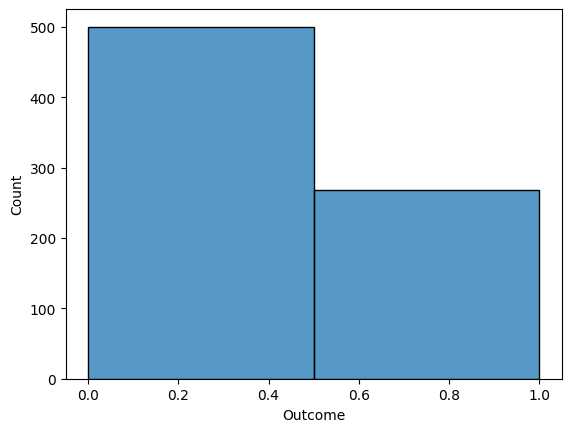

In [4]:

# Посмотрими на распределение целевой переменной
sns.histplot(df['Outcome'], bins=2)
plt.show()


## INFO:
# Преобладает диагностирование отсутствия диабета


Имеем значительную разницу в числе здоровых людей, по сравнению с теми, у которых есть диабет - эта информация нам определит выбор метрики для моделей на этапах обучения, а так же оперделит еще один метод

Заполним нулевые значения в данных медианой

In [5]:
# В столбцах Glucose BloodPressure SkinThickness Insulin BMI - имеются нулевые значения
# Заполним эти значения значениями median


features_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for feature in features_with_zeros:
    # Вычисляем медиану только по ненулевым значениям
    median_val = df.loc[df[feature] != 0, feature].median()
    # Заменяем нули на эту медиану
    df[feature] = df[feature].replace(0, median_val)


print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

Графически посмотрим на наши данные и определим потенциальные корреляции

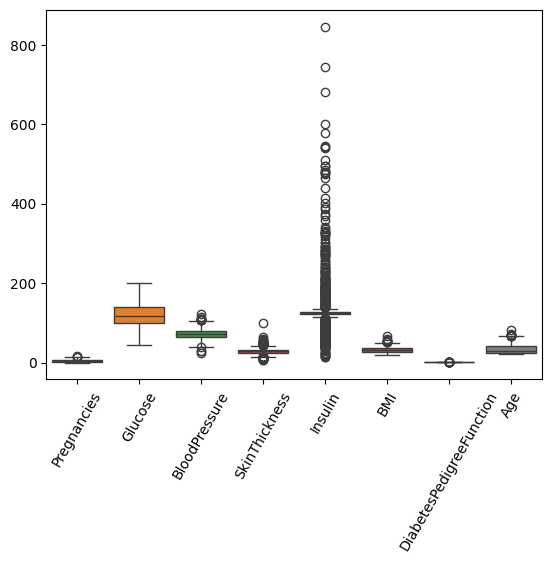

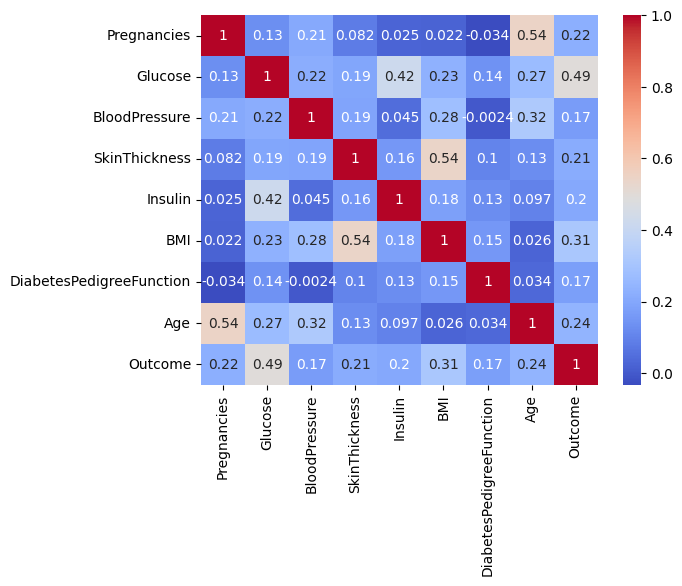

In [6]:
df_copy = df.copy()
df_copy = df_copy.drop(columns=['Outcome'])

# Посмотрим ящики с усами для каждого признака
sns.boxplot(df_copy)
plt.xticks(rotation=60)
plt.show()

# Тепловая карта:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()




- Глядя на тепловую карту - признаки, которые наиболее всего коррелируют с таргетом: Glucose, BMI, Age,  Pregnancies

- Статистическими методами проверим наши замеченные предположения окорреляции:

In [7]:
# Проверим корреляцию по критериям для Glucose и BMI
# Посчитаем коэффициент Корреляции пирсона
from scipy.stats import pearsonr

r_Glucose, p_value_Glucose = pearsonr(df['Glucose'], df['Outcome'])
r_BMI, p_value_BMI = pearsonr(df['BMI'], df['Outcome'])

print(f"Коэффициент корреляции Пирсона для Glucose и Outcome: {r_Glucose}")
print(f"Коэффициент корреляции Пирсона для BMI и Outcome: {r_BMI}")
print("----------------------------------------")
print(f"p-value для Glucose и Outcome: {p_value_Glucose}")
print(f"p-value для BMI и Outcome: {p_value_BMI}")

## INFO:
# P-value: для обеих данных оно меньше 0.05 - вероятност того что корреляция случайная - отклоняется
# Коэффициент Пирсона - 0.3 и 0.4 - умеренно положительная корреляция

# Посмотрим на столбцы Age, Pregnancies
print()
print("Посмотрим на столбцы Age, Pregnancies:")
print()
r_Age, p_value_Age = pearsonr(df['Age'], df['Outcome'])
r_Pregnancies, p_value_Pregnancies = pearsonr(df['Pregnancies'], df['Outcome'])

print(f"Коэффициент корреляции Пирсона для Age и Outcome: {r_Age}")
print(f"Коэффициент корреляции Пирсона для Pregnancies и Outcome: {r_Pregnancies}")
print("----------------------------------------")
print(f"p-value для Age и Outcome: {p_value_Age}")
print(f"p-value для Pregnancies и Outcome: {p_value_Pregnancies}")

Коэффициент корреляции Пирсона для Glucose и Outcome: 0.492782403915027
Коэффициент корреляции Пирсона для BMI и Outcome: 0.31203833867711145
----------------------------------------
p-value для Glucose и Outcome: 3.128719041842037e-48
p-value для BMI и Outcome: 8.336902677507714e-19

Посмотрим на столбцы Age, Pregnancies:

Коэффициент корреляции Пирсона для Age и Outcome: 0.2383559830271978
Коэффициент корреляции Пирсона для Pregnancies и Outcome: 0.2218981530339868
----------------------------------------
p-value для Age и Outcome: 2.2099754606654604e-11
p-value для Pregnancies и Outcome: 5.06512729805357e-10


- P-value: для Glucose и BMI оно меньше 0.05 - вероятност того что корреляция случайная - отклоняется
- Коэффициент Пирсона для Glucose и BMI - 0.3 и 0.4 - умеренно положительная корреляция

- столбцы Glucose, BloodPreasure, BMI - имеют распределение, схожее с нормальным
- В SkinThickness - имеется выброс (если его убрать то распределение тоже будет нормальным)
- Столбец DiabetesPredegreeFunction - напоминает нормальное распределение, смещенное влево

Применим логарифмическое преобразование признааков

In [8]:
features_to_transform = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# В цикле создаем новые столбцы с логарифмированными значениями
for feature in features_to_transform:
    # np.log1p(x) вычисляет log(1+x), что безопасно для нулевых значений
    df_copy[feature] = np.log1p(df_copy[feature])


Проведем масштабирование признаков

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_copy, df['Outcome'], test_size=0.2, random_state=42, stratify = df['Outcome'])

print(f"Размер обучающей выборки для Scaler: {X_train.shape}")
print(f"Размер тестовой выборки Scaler: {X_test.shape}")
print("-" * 30)


Размер обучающей выборки для Scaler: (614, 8)
Размер тестовой выборки Scaler: (154, 8)
------------------------------


In [10]:
# Масштабирование:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Преобразование обратно в DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


Посотрим на ящики с усами после наших преобразований

In [9]:
# 1. Объединяем масштабированные признаки
X_scaled_full = pd.concat([X_train_scaled, X_test_scaled])

# 2. Объединяем таргеты
y_full = pd.concat([y_train, y_test])

# 3. Соединяем признаки и таргет по индексам
# Важно: y_full здесь имеет правильные индексы, т.к. мы их не теряли
df_scaled_full_with_target = X_scaled_full.join(y_full)




In [11]:
sns.boxplot(df_scaled_full_with_target)
plt.xticks(rotation=60)
plt.show()

NameError: name 'df_scaled_full_with_target' is not defined

Оценим важность признаков при помощи SelectKBest и RandomForest

SelectkBest:

                    Feature     F-score       P-value
1                   Glucose  202.871863  5.765208e-40
5                       BMI   76.426820  2.196120e-17
4                   Insulin   55.411787  3.331989e-13
7                       Age   48.909626  7.043354e-12
3             SkinThickness   35.566198  4.169361e-09
0               Pregnancies   27.722942  1.940682e-07
2             BloodPressure   20.263736  8.078272e-06
6  DiabetesPedigreeFunction   18.849974  1.654721e-05


/tmp/ipython-input-12-3992412016.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F-score', y='Feature', data=feature_scores_sorted, palette='viridis')


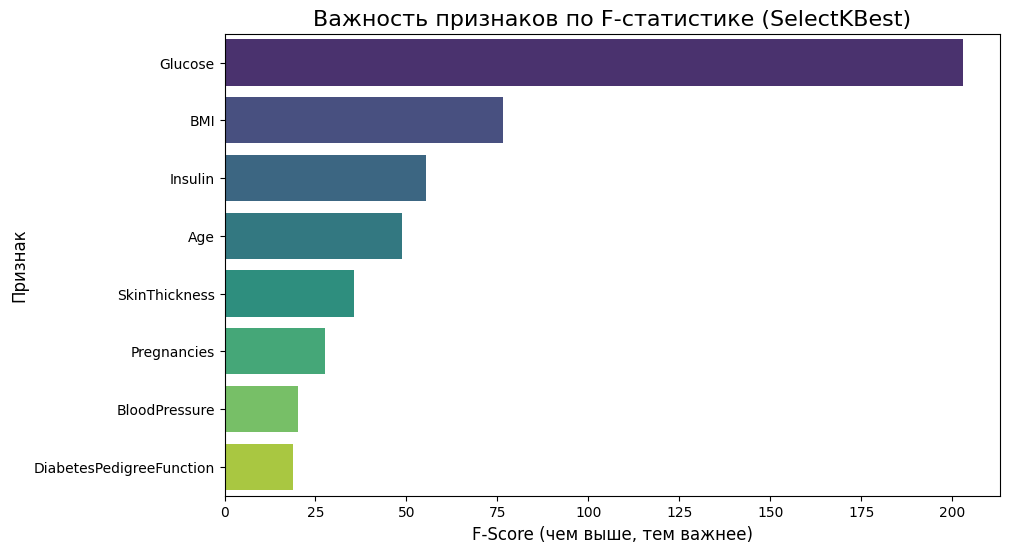

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func= f_classif, k = 'all')

selector.fit(X_train_scaled, y_train)

features_score = pd.DataFrame({
                             'Feature':df_copy.columns,
                             'F-score':selector.scores_,
                             'P-value':selector.pvalues_
                             })

feature_scores_sorted = features_score.sort_values(by='F-score', ascending=False)

print(feature_scores_sorted)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x='F-score', y='Feature', data=feature_scores_sorted, palette='viridis')
plt.title('Важность признаков по F-статистике (SelectKBest)', fontsize=16)
plt.xlabel('F-Score (чем выше, тем важнее)', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.show()

RandomForest

                    Feature  Importance
1                   Glucose    0.274086
5                       BMI    0.161903
6  DiabetesPedigreeFunction    0.125020
7                       Age    0.112985
4                   Insulin    0.091224
2             BloodPressure    0.083518
0               Pregnancies    0.080795
3             SkinThickness    0.070468


/tmp/ipython-input-13-1382479731.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


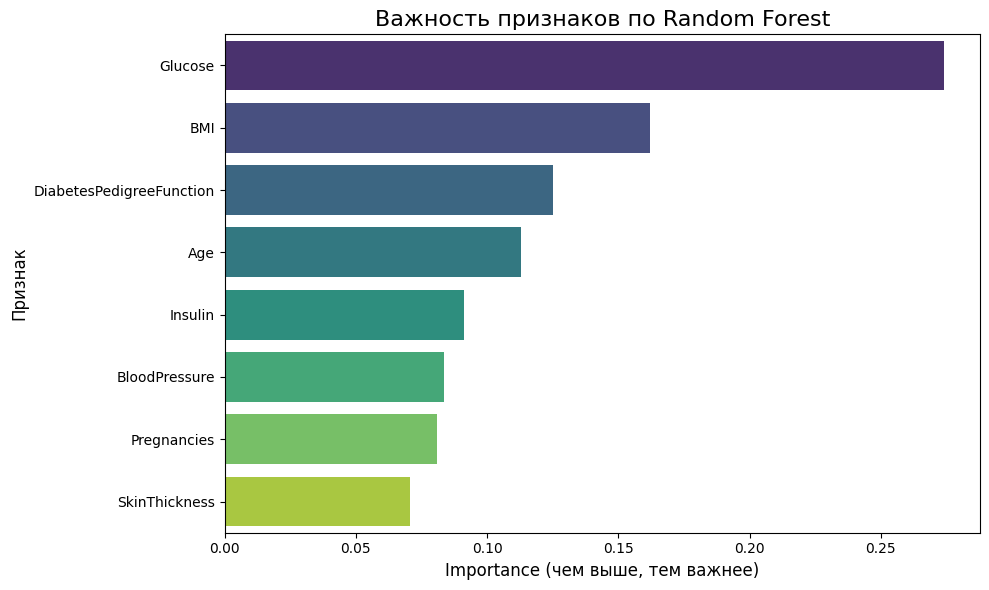

In [13]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Обучаем Random Forest на всех признаках
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Извлекаем важности признаков
feature_importances = rf.feature_importances_

# Формируем DataFrame
features_score = pd.DataFrame({
    'Feature': df_copy.columns,
    'Importance': feature_importances
})

# Сортируем по убыванию важности
feature_scores_sorted = features_score.sort_values(by='Importance', ascending=False)

print(feature_scores_sorted)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_scores_sorted,
    palette='viridis'
)
plt.title('Важность признаков по Random Forest', fontsize=16)
plt.xlabel('Importance (чем выше, тем важнее)', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.tight_layout()
plt.show()


Выбор в том, какие фичи отбросить - не однозначен; обрачу внимание на кросс валидацию, в качестве обучающей модели возьму RandomForestClassifier() так как он замечает и нелинейные зависимости в данных и длеает оценку в совокупности с остальными данными; По ТЗ в качестве метрики возьммем Recall

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


# Порядок фичей пойдет так, как их отсортировал Random Forest
features_for_cv = feature_scores_sorted['Feature'].tolist()

scores_cv = []
std_scores_cv = []


model_for_cv = RandomForestClassifier(n_estimators=100, random_state=42)


for k in range(1, len(features_for_cv) + 1):

    top_k_features = features_for_cv[:k]


    X_train_subset = X_train_scaled[top_k_features]

    scores = cross_val_score(
        model_for_cv,
        X_train_subset,
        y_train,
        cv=5,
        scoring='recall'
    )

    # 4. Сохраняем среднее значение и стандартное отклонение
    mean_score = scores.mean()
    std_score = scores.std()
    scores_cv.append(mean_score)
    std_scores_cv.append(std_score)

    print(f"Проверка для {k} признаков. recall: {mean_score:.4f} ± {std_score:.4f}. Признаки: {top_k_features}")



Проверка для 1 признаков. recall: 0.4720 ± 0.1034. Признаки: ['Glucose']
Проверка для 2 признаков. recall: 0.5472 ± 0.0675. Признаки: ['Glucose', 'BMI']
Проверка для 3 признаков. recall: 0.5891 ± 0.0498. Признаки: ['Glucose', 'BMI', 'DiabetesPedigreeFunction']
Проверка для 4 признаков. recall: 0.6032 ± 0.0855. Признаки: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Проверка для 5 признаков. recall: 0.5986 ± 0.0821. Признаки: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin']
Проверка для 6 признаков. recall: 0.6126 ± 0.0557. Признаки: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin', 'BloodPressure']
Проверка для 7 признаков. recall: 0.5891 ± 0.0712. Признаки: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin', 'BloodPressure', 'Pregnancies']
Проверка для 8 признаков. recall: 0.5887 ± 0.0733. Признаки: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin', 'BloodPressure', 'Pregnancies', 'SkinThickness']


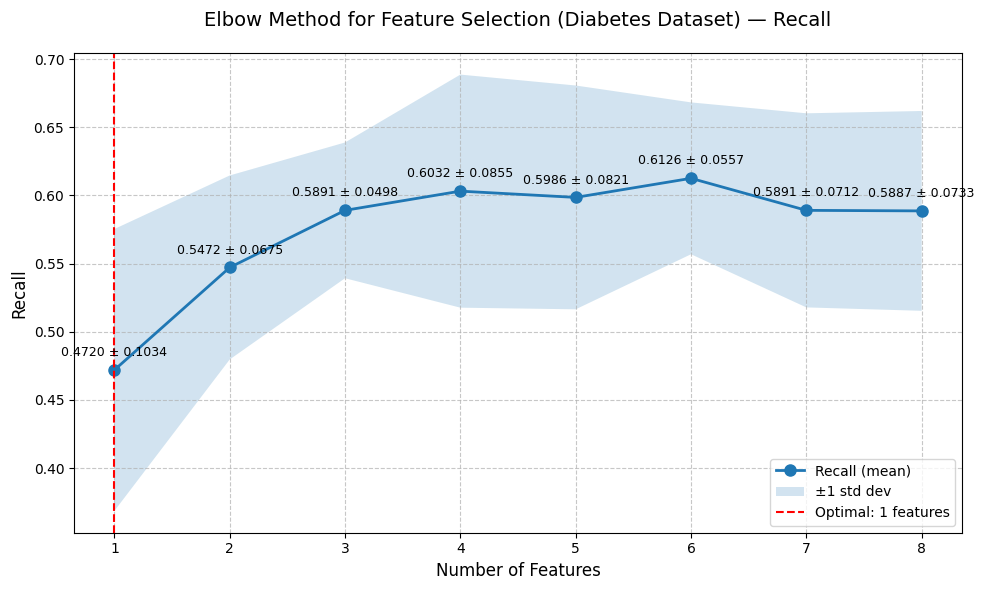

In [15]:

import matplotlib.pyplot as plt
import numpy as np

features_count = np.arange(1, 9)
recall_scores = [
    0.4720,  # 1 признак
    0.5472,  # 2 признака
    0.5891,  # 3 признака
    0.6032,  # 4 признака
    0.5986,  # 5 признаков
    0.6126,  # 6 признаков
    0.5891,  # 7 признаков
    0.5887   # 8 признаков
]
std_recalls = [
    0.1034,  # 1 признак
    0.0675,  # 2 признака
    0.0498,  # 3 признака
    0.0855,  # 4 признака
    0.0821,  # 5 признаков
    0.0557,  # 6 признаков
    0.0712,  # 7 признаков
    0.0733   # 8 признаков
]

deltas = np.diff(recall_scores)
optimal_idx = np.argmax(deltas)

plt.figure(figsize=(10, 6))

plt.plot(features_count, recall_scores,
         marker='o', markersize=8, linewidth=2,
         label='Recall (mean)')


plt.fill_between(features_count,
                 np.array(recall_scores) - np.array(std_recalls),
                 np.array(recall_scores) + np.array(std_recalls),
                 alpha=0.2, label='±1 std dev')


plt.axvline(x=features_count[optimal_idx],
            color='red', linestyle='--', linewidth=1.5,
            label=f'Optimal: {features_count[optimal_idx]} features')

for i, (score, std) in enumerate(zip(recall_scores, std_recalls)):
    plt.annotate(f'{score:.4f} ± {std:.4f}',
                 (features_count[i], score),
                 textcoords="offset points",
                 xytext=(0, 10), ha='center', fontsize=9)


plt.title('Elbow Method for Feature Selection (Diabetes Dataset) — Recall', fontsize=14, pad=20)
plt.xlabel('Number of Features', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.xticks(features_count)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

feature_sets = [
    ['Glucose'],
    ['Glucose', 'BMI'],
    ['Glucose', 'BMI', 'DiabetesPedigreeFunction'],
    ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
    ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin'],
    ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin', 'BloodPressure'],
    ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin', 'BloodPressure', 'Pregnancies'],
    ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin', 'BloodPressure', 'Pregnancies', 'SkinThickness']
]



- При шести признаках имеем макмимальный Recall

Обучим модели

In [16]:

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score
)

# Отобранные признаки (по методу локтя)
optimal_features = ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin', 'BloodPressure']


X_train_final = X_train_scaled[optimal_features]
X_test_final = X_test_scaled[optimal_features]

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}


results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'PR-AUC'])

for model_name, model in models.items():
    print(f"Обучение модели: {model_name}...")
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)
    y_proba = model.predict_proba(X_test_final)[:, 1]

    print(f"Расчет метрик для модели {model_name}...")
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)

    results.loc[model_name] = [acc, prec, rec, f1, roc_auc, pr_auc]

print("\n📊 Таблица метрик моделей (без балансировки):")
display(results.sort_values(by='F1-score', ascending=False))


Обучение модели: Logistic Regression...
Расчет метрик для модели Logistic Regression...
Обучение модели: SVM...
Расчет метрик для модели SVM...
Обучение модели: Random Forest...
Расчет метрик для модели Random Forest...
Обучение модели: XGBoost...
Расчет метрик для модели XGBoost...

📊 Таблица метрик моделей (без балансировки):


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:12:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC
XGBoost,0.753247,0.660000,0.611111,0.634615,0.804074,0.678890
Random Forest,0.766234,0.704545,0.574074,0.632653,0.823241,0.703655
SVM,0.740260,0.659091,0.537037,0.591837,0.820000,0.702870
Logistic Regression,0.720779,0.622222,0.518519,0.565657,0.810926,0.671763


Обучение моделей с применением class_weight='balanced'

In [16]:

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score
)


optimal_features = ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin', 'BloodPressure']
X_train_final = X_train_scaled[optimal_features]
X_test_final = X_test_scaled[optimal_features]

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

models_balanced = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight
    )
}


results_balanced = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'PR-AUC'])

for model_name, model in models_balanced.items():
    print(f"\n📘 Обучение сбалансированной модели: {model_name}...")
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)
    y_proba = model.predict_proba(X_test_final)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)


    results_balanced.loc[model_name] = [acc, prec, rec, f1, roc_auc, pr_auc]


print("\n📊 Таблица метрик моделей (с балансировкой классов):")
display(results_balanced.sort_values(by='F1-score', ascending=False))



📘 Обучение сбалансированной модели: Logistic Regression...

📘 Обучение сбалансированной модели: SVM...

📘 Обучение сбалансированной модели: Random Forest...

📘 Обучение сбалансированной модели: XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:39:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 Таблица метрик моделей (с балансировкой классов):


,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC
SVM,0.740260,0.600000,0.777778,0.677419,0.826481,0.699562
Random Forest,0.772727,0.702128,0.611111,0.653465,0.835926,0.729478
Logistic Regression,0.714286,0.575758,0.703704,0.633333,0.811111,0.672679
XGBoost,0.740260,0.640000,0.592593,0.615385,0.810370,0.691278


Улучшать текущие метрики будем путем выбора наилучших гиперпараметров в  ходе кросс валидации

In [17]:

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from scipy.stats import loguniform
from sklearn.metrics import f1_score


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


param_grid_lr = {
    'C': np.logspace(-4, 4, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_lr = GridSearchCV(
    LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42),
    param_grid_lr,
    scoring='f1_macro',
    cv=cv,
    n_jobs=-1
)
grid_lr.fit(X_train_final, y_train)
print("✅ Лучшие параметры для Logistic Regression:", grid_lr.best_params_)


param_dist_svm = {
    'C': loguniform(1e-3, 1e3),
    'gamma': loguniform(1e-4, 1e1)
}

rand_svm = RandomizedSearchCV(
    SVC(class_weight='balanced', probability=True, random_state=42),
    param_distributions=param_dist_svm,
    n_iter=50,
    scoring='f1_macro',
    cv=cv,
    random_state=42,
    n_jobs=-1
)
rand_svm.fit(X_train_final, y_train)
print("✅ Лучшие параметры для SVM:", rand_svm.best_params_)


param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid_rf,
    scoring='f1_macro',
    cv=cv,
    n_jobs=-1
)
grid_rf.fit(X_train_final, y_train)
print("✅ Лучшие параметры для Random Forest:", grid_rf.best_params_)


param_dist_xgb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

rand_xgb = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                  scale_pos_weight=scale_pos_weight, random_state=42),
    param_distributions=param_dist_xgb,
    n_iter=50,
    scoring='f1_macro',
    cv=cv,
    random_state=42,
    n_jobs=-1
)
rand_xgb.fit(X_train_final, y_train)
print("✅ Лучшие параметры для XGBoost:", rand_xgb.best_params_)



✅ Лучшие параметры для Logistic Regression: {'C': np.float64(0.046415888336127774), 'penalty': 'l2', 'solver': 'saga'}
✅ Лучшие параметры для SVM: {'C': np.float64(36.7037376252939), 'gamma': np.float64(0.06403036652671171)}
✅ Лучшие параметры для Random Forest: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
✅ Лучшие параметры для XGBoost: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:43:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [18]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, precision_recall_curve, auc
)


best_params = {
    'Logistic Regression': grid_lr.best_params_,
    'SVM': rand_svm.best_params_,
    'Random Forest': grid_rf.best_params_,
    'XGBoost': rand_xgb.best_params_
}

final_models = {
    'Logistic Regression': LogisticRegression(
        random_state=42, max_iter=2000, class_weight='balanced', **best_params['Logistic Regression']
    ),
    'SVM': SVC(
        kernel='rbf', probability=True, random_state=42, class_weight='balanced', **best_params['SVM']
    ),
    'Random Forest': RandomForestClassifier(
        random_state=42, class_weight='balanced', **best_params['Random Forest']
    ),
    'XGBoost': XGBClassifier(
        random_state=42, use_label_encoder=False, eval_metric='logloss',
        scale_pos_weight=scale_pos_weight, **best_params['XGBoost']
    )
}


final_results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'PR-AUC'])
models_proba = {}


for model_name, model in final_models.items():
    print(f"\n Финальное обучение: {model_name}")
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)
    y_proba = model.predict_proba(X_test_final)[:, 1]
    models_proba[model_name] = y_proba


    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)


    final_results.loc[model_name] = [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_proba),
        pr_auc
    ]


print("\n📊 Итоговая таблица метрик моделей с подобранными параметрами:")
display(final_results.sort_values(by='F1-score', ascending=False))



 Финальное обучение: Logistic Regression

 Финальное обучение: SVM

 Финальное обучение: Random Forest

 Финальное обучение: XGBoost

📊 Итоговая таблица метрик моделей с подобранными параметрами:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:43:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC
XGBoost,0.759740,0.626866,0.777778,0.694215,0.815185,0.699985
SVM,0.753247,0.633333,0.703704,0.666667,0.827593,0.667788
Random Forest,0.740260,0.612903,0.703704,0.655172,0.817778,0.706312
Logistic Regression,0.720779,0.582090,0.722222,0.644628,0.808519,0.650805


В качестве лучшей модели возьмем Random Forest и сделаем упор на кросс-валидацию по оптимизации с комбинировнной метрикой ROC-AUC + PR-AUC

In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    make_scorer,
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    auc
)


def combined_roc_pr_auc_scorer(y_true, y_proba):

    pr_auc = average_precision_score(y_true, y_proba)
    roc_auc = roc_auc_score(y_true, y_proba)
    return np.sqrt(pr_auc * roc_auc)


combined_scorer = make_scorer(combined_roc_pr_auc_scorer, needs_proba=True)


if 'cv' not in locals():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_dist_rf_aggressive = {
    'n_estimators': randint(200, 1200),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}


rand_rf_combined = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_distributions=param_dist_rf_aggressive,
    n_iter=200,
    scoring=combined_scorer,
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rand_rf_combined.fit(X_train_final, y_train)


final_balanced_model = rand_rf_combined.best_estimator_

y_proba = final_balanced_model.predict_proba(X_test_final)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc_value = auc(recall, precision)

# Поиск порога для Recall >= 0.80
pr_df = pd.DataFrame({'threshold': np.append(thresholds, 1), 'precision': precision, 'recall': recall})
pr_df['f1'] = 2 * (pr_df.precision * pr_df.recall) / (pr_df.precision + pr_df.recall + 1e-7)
candidates = pr_df[pr_df['recall'] >= 0.80]
if not candidates.empty:
    best_threshold_row = candidates.loc[candidates['f1'].idxmax()]
    print("✅ Условие Recall >= 0.80 достижимо.")
else:
    best_threshold_row = pr_df.loc[pr_df['f1'].idxmax()]
    print("⚠️ Не удалось достичь Recall >= 0.80. Выбран порог по макс. F1-score.")
optimal_threshold = best_threshold_row['threshold']
print(f"✅ Найден оптимальный порог: {optimal_threshold:.4f}")



y_pred_optimized = (y_proba >= optimal_threshold).astype(int)
final_optimized_results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'PR-AUC'])
final_optimized_results.loc["Random Forest (Balanced Optimized)"] = [
    accuracy_score(y_test, y_pred_optimized),
    precision_score(y_test, y_pred_optimized),
    recall_score(y_test, y_pred_optimized),
    f1_score(y_test, y_pred_optimized),
    roc_auc_score(y_test, y_proba),
    pr_auc_value
]


comparison_df = pd.concat([final_results, final_optimized_results])
display(comparison_df.sort_values(by='F1-score', ascending=False))


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


✅ Условие Recall >= 0.80 достижимо.
✅ Найден оптимальный порог: 0.3516


,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC
Random Forest (Balanced Optimized),0.746753,0.594937,0.870370,0.706767,0.825741,0.707780
XGBoost,0.759740,0.626866,0.777778,0.694215,0.815185,0.699985
SVM,0.753247,0.633333,0.703704,0.666667,0.827593,0.667788
Random Forest,0.740260,0.612903,0.703704,0.655172,0.817778,0.706312
Logistic Regression,0.720779,0.582090,0.722222,0.644628,0.808519,0.650805


Такой же подход для XGBoost
- UPD: Для SVM, Logistic Regression и XGBoost нет занчимых улучшений по сравнению с Random Forest, лучшей моделью при этом походе оказалась Random Forest

In [21]:


def combined_roc_pr_auc_scorer(y_true, y_proba):
    pr_auc = average_precision_score(y_true, y_proba)
    roc_auc = roc_auc_score(y_true, y_proba)
    return np.sqrt(pr_auc * roc_auc)

combined_scorer = make_scorer(combined_roc_pr_auc_scorer, needs_proba=True)


if 'cv' not in locals():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# агрессивный подбор гиперпараметров для XGBoost
param_dist_xgb_aggressive = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.29),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 5),
    'min_child_weight': randint(1, 10),
}


rand_xgb_combined = RandomizedSearchCV(
    XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ),
    param_distributions=param_dist_xgb_aggressive,
    n_iter=200,
    scoring=combined_scorer,
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)


rand_xgb_combined.fit(X_train_final, y_train)


final_xgb_model = rand_xgb_combined.best_estimator_

y_proba_xgb = final_xgb_model.predict_proba(X_test_final)[:, 1]

precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, y_proba_xgb)
pr_auc_xgb = auc(recall_xgb, precision_xgb)

pr_df_xgb = pd.DataFrame({
    'threshold': np.append(thresholds_xgb, 1),
    'precision': precision_xgb,
    'recall': recall_xgb
})
pr_df_xgb['f1'] = 2 * (pr_df_xgb.precision * pr_df_xgb.recall) / (pr_df_xgb.precision + pr_df_xgb.recall + 1e-7)

candidates_xgb = pr_df_xgb[pr_df_xgb['recall'] >= 0.80]
if not candidates_xgb.empty:
    best_row_xgb = candidates_xgb.loc[candidates_xgb['f1'].idxmax()]
    print("✅ Условие Recall >= 0.80 достижимо для XGBoost.")
else:
    best_row_xgb = pr_df_xgb.loc[pr_df_xgb['f1'].idxmax()]
    print("⚠️ Для XGBoost Recall >= 0.80 недостижим — берём порог по макс. F1.")

optimal_threshold_xgb = best_row_xgb['threshold']
print(f"✅ Оптимальный порог для XGBoost: {optimal_threshold_xgb:.4f}")

# итоговые метрики
y_pred_xgb_opt = (y_proba_xgb >= optimal_threshold_xgb).astype(int)
results_xgb = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'PR-AUC'])
results_xgb.loc["XGBoost (Balanced Optimized)"] = [
    accuracy_score(y_test, y_pred_xgb_opt),
    precision_score(y_test, y_pred_xgb_opt),
    recall_score(y_test, y_pred_xgb_opt),
    f1_score(y_test, y_pred_xgb_opt),
    roc_auc_score(y_test, y_proba_xgb),
    pr_auc_xgb
]

# объединяем с предыдущими
comparison_df = pd.concat([final_results, results_xgb])
display(comparison_df.sort_values(by='F1-score', ascending=False))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(
/usr/local/lib/python3.11/dis

✅ Условие Recall >= 0.80 достижимо для XGBoost.


,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC
XGBoost,0.759740,0.626866,0.777778,0.694215,0.815185,0.699985
XGBoost (Balanced Optimized),0.740260,0.594595,0.814815,0.687500,0.808148,0.699969
SVM,0.753247,0.633333,0.703704,0.666667,0.827593,0.667788
Random Forest,0.740260,0.612903,0.703704,0.655172,0.817778,0.706312
Logistic Regression,0.720779,0.582090,0.722222,0.644628,0.808519,0.650805


Для нашей  модели Random Forest применим более продвинутый подход для работы с дисбалансом классов - SMOTE

In [29]:
!pip install -U imbalanced-learn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    make_scorer,
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    auc
)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

def combined_roc_pr_auc_scorer(y_true, y_proba):
    pr_auc = average_precision_score(y_true, y_proba)
    roc_auc = roc_auc_score(y_true, y_proba)
    return np.sqrt(pr_auc * roc_auc)

combined_scorer = make_scorer(combined_roc_pr_auc_scorer, needs_proba=True)

if 'cv' not in locals():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


smote_pipline = ImbPipeline([
    ('smote', SMOTE(random_state = 42)),
    ('classifier', RandomForestClassifier(random_state = 42))
])

param_dist_rf_smote = {
    'classifier__n_estimators': randint(200, 1200),
    'classifier__max_depth': randint(5, 30),
    'classifier__min_samples_split': randint(2, 11),
    'classifier__min_samples_leaf': randint(1, 5),
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__criterion': ['gini', 'entropy']
}

rand_rf_smote = RandomizedSearchCV(
    estimator=smote_pipline,
    param_distributions=param_dist_rf_smote,
    n_iter=200,
    scoring=combined_scorer,
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)


rand_rf_smote.fit(X_train_final, y_train)

final_smote_model = rand_rf_smote.best_estimator_

y_proba_smote = final_smote_model.predict_proba(X_test_final)[:, 1]

precision_smote, recall_smote, thresholds_smote = precision_recall_curve(y_test, y_proba_smote)

pr_auc_value_smote = auc(recall_smote, precision_smote)



# Найдем оптимальный порог
pr_df_smote = pd.DataFrame({'threshold': np.append(thresholds_smote, 1), 'precision': precision_smote, 'recall': recall_smote})
pr_df_smote['f1'] = 2 * (pr_df_smote.precision * pr_df_smote.recall) / (pr_df_smote.precision + pr_df_smote.recall + 1e-7)

candidates_smote = pr_df_smote[pr_df_smote['recall'] >= 0.80]
if not candidates_smote.empty:
    best_threshold_row_smote = candidates_smote.loc[candidates_smote['f1'].idxmax()]
    print("✅ (SMOTE) Условие Recall >= 0.80 достижимо.")
else:
    best_threshold_row_smote = pr_df_smote.loc[pr_df_smote['f1'].idxmax()]
    print("⚠️ (SMOTE) Не удалось достичь Recall >= 0.80. Выбран порог по макс. F1-score.")
optimal_threshold_smote = best_threshold_row_smote['threshold']
print(f"✅ (SMOTE) Найден оптимальный порог: {optimal_threshold_smote:.4f}")



y_pred_optimized_smote = (y_proba_smote >= optimal_threshold_smote).astype(int)


final_smote_results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'PR-AUC'])
final_smote_results.loc["Random Forest (SMOTE Optimized)"] = [
    accuracy_score(y_test, y_pred_optimized_smote),
    precision_score(y_test, y_pred_optimized_smote),
    recall_score(y_test, y_pred_optimized_smote),
    f1_score(y_test, y_pred_optimized_smote),
    roc_auc_score(y_test, y_proba_smote),
    pr_auc_value_smote
]

comparison_df = pd.concat([final_optimized_results, final_smote_results])
display(comparison_df.sort_values(by='F1-score', ascending=False))


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


✅ (SMOTE) Условие Recall >= 0.80 достижимо.
✅ (SMOTE) Найден оптимальный порог: 0.3570


,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC
Random Forest (Balanced Optimized),0.746753,0.594937,0.87037,0.706767,0.825741,0.70778
Random Forest (SMOTE Optimized),0.740260,0.587500,0.87037,0.701493,0.829074,0.71410


При помощи SMOTE метода - нам не значительно удалось поднять метрики модели Random Forest

Попробуем еще один подход по улучшению метрик из ТЗ: Feature Engeneering

Сделаем копию данных и добавиим 3 новых столбца как комбинацию других для того

In [23]:
import pandas as pd
import numpy as np


# --- Создаем новые признаки ---
df_engineered = df.copy()


df_engineered['Glucose_x_BMI'] = df_engineered['Glucose'] * df_engineered['BMI']


df_engineered['Glucose_to_Insulin_Ratio'] = df_engineered['Glucose'] / (df_engineered['Insulin'] + 1e-6)

df_engineered['Age_x_BloodPressure'] = df_engineered['Age'] * df_engineered['BloodPressure']

print("Новые признаки созданы. DataFrame теперь имеет форму:", df_engineered.shape)

print(df_engineered.head(20))

# --- Подготовка данных для модели ---
X = df_engineered.drop('Outcome', axis=1)
y = df_engineered['Outcome']

# --- Разделение на обучающую и тестовую выборки ---
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Новые признаки созданы. DataFrame теперь имеет форму: (768, 12)
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35      125  33.6   
1             1       85             66             29      125  26.6   
2             8      183             64             29      125  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74             29      125  25.6   
6             3       78             50             32       88  31.0   
7            10      115             72             29      125  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96             29      125  32.3   
10            4      110             92             29      125  37.6   
11           10      168             74             29      

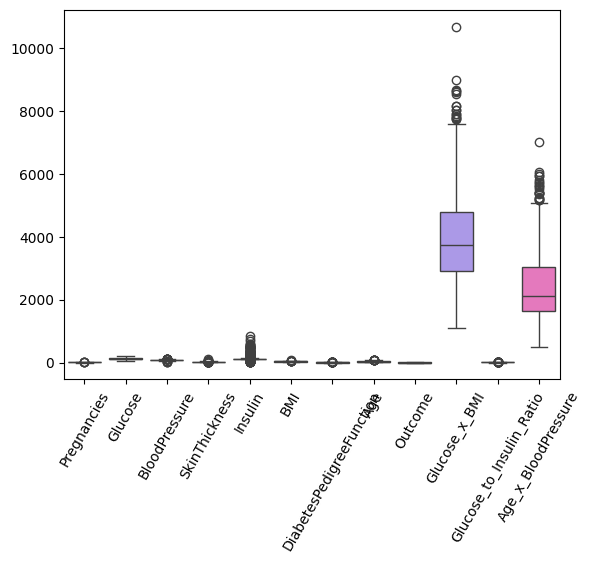

In [24]:
sns.boxplot(df_engineered)
plt.xticks(rotation=60)
plt.show()

Проведем логарифмическоке преобразование и масштабирование

In [27]:

features_to_transform = [
    'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
    'DiabetesPedigreeFunction', 'Age',
    'Glucose_x_BMI', 'Glucose_to_Insulin_Ratio', 'Age_x_BloodPressure'
]

X_train_log = X_train.copy()
X_test_log = X_test.copy()


for feature in features_to_transform:
    X_train_log[feature] = np.log1p(X_train_log[feature])
    X_test_log[feature] = np.log1p(X_test_log[feature])

print("✅ Логарифмическое преобразование завершено.")



--- Выполнение логарифмического преобразования ---
✅ Логарифмическое преобразование завершено.


In [26]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train_log)
X_test_scaled = scaler.transform(X_test_log)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_log.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_log.columns)



--- Выполнение масштабирования (StandardScaler) ---
✅ Масштабирование завершено.
Финальная форма обучающей выборки: (614, 11)


In [28]:

X_scaled_full = pd.concat([X_train_scaled, X_test_scaled])


y_full = pd.concat([y_train, y_test])

df_scaled_full_with_target = X_scaled_full.join(y_full)


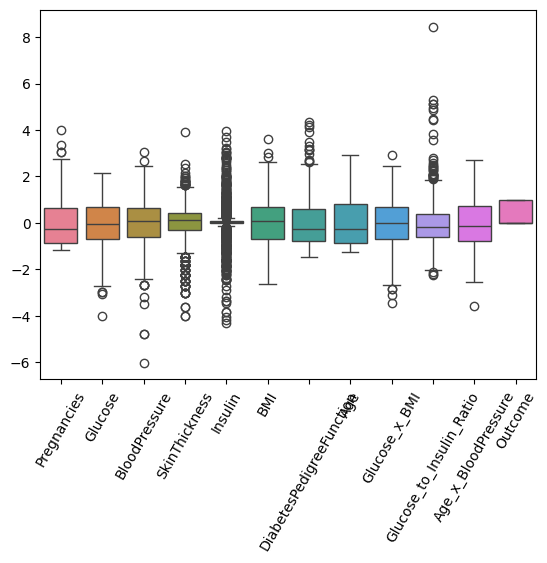

In [29]:
sns.boxplot(df_scaled_full_with_target )
plt.xticks(rotation=60)
plt.show()

Оценим важность признаков

--- Важность признаков после инженерии ---
                     Feature  Importance
8              Glucose_x_BMI    0.215252
1                    Glucose    0.144029
5                        BMI    0.103655
10       Age_x_BloodPressure    0.093986
6   DiabetesPedigreeFunction    0.086702
7                        Age    0.083317
9   Glucose_to_Insulin_Ratio    0.063952
4                    Insulin    0.055433
2              BloodPressure    0.054431
3              SkinThickness    0.050738
0                Pregnancies    0.048507


/tmp/ipython-input-30-1600304918.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


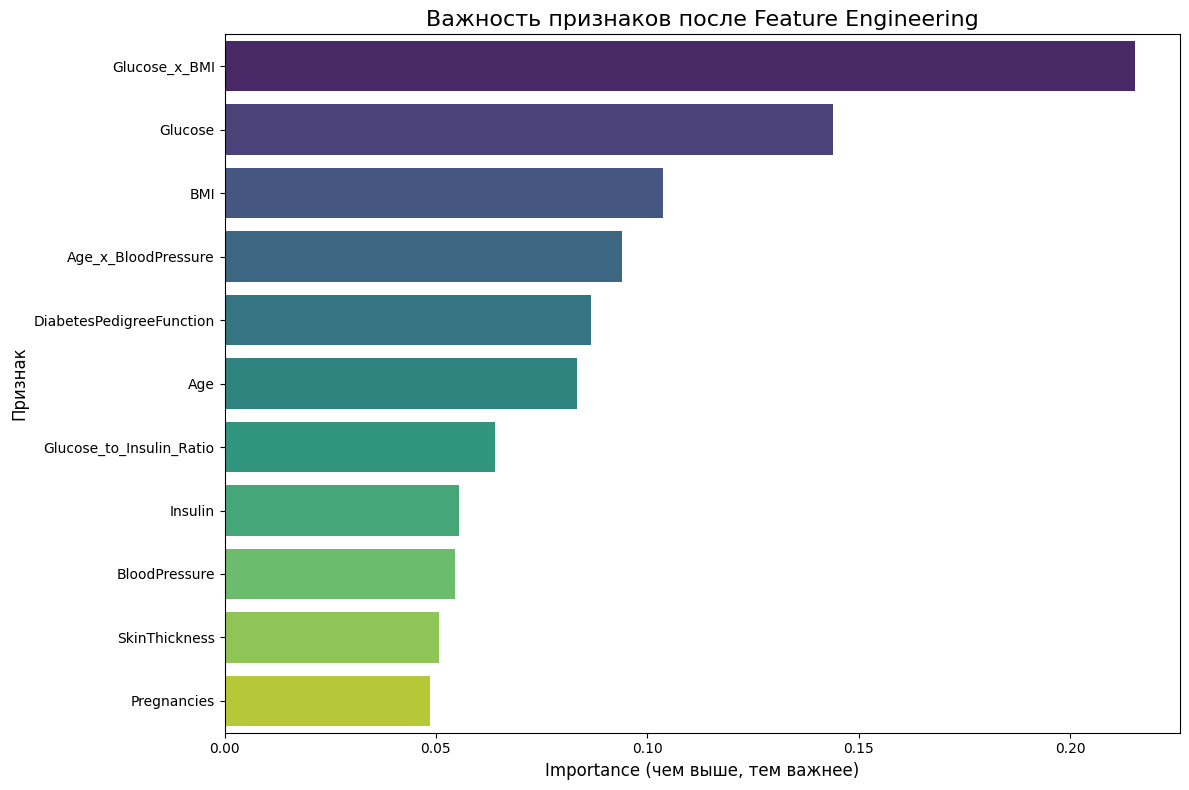

In [30]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


rf_importance = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_importance.fit(X_train_scaled, y_train)


feature_importances = rf_importance.feature_importances_

# Формируем DataFrame
features_score = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': feature_importances
})


feature_scores_sorted = features_score.sort_values(by='Importance', ascending=False)

print("--- Важность признаков после инженерии ---")
print(feature_scores_sorted)

plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_scores_sorted,
    palette='viridis'
)
plt.title('Важность признаков после Feature Engineering', fontsize=16)
plt.xlabel('Importance (чем выше, тем важнее)', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.tight_layout()
plt.show()

Кросс валидация
- Метрика Recall

In [34]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

features_for_cv = feature_scores_sorted['Feature'].tolist()

scores_cv = []
std_scores_cv = []

cv_strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_for_cv = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

print("\n--- Запуск кросс-валидации для отбора признаков ---")
for k in range(1, len(features_for_cv) + 1):
    top_k_features = features_for_cv[:k]

    X_train_subset = X_train_scaled[top_k_features]


    scores = cross_val_score(
        model_for_cv,
        X_train_subset,
        y_train,
        cv=cv_strat,
        scoring='recall'
    )

    mean_score = scores.mean()
    std_score = scores.std()
    scores_cv.append(mean_score)
    std_scores_cv.append(std_score)

    print(f"Для {k} признаков. PR-AUC: {mean_score:.4f} ± {std_score:.4f}. Признаки: {top_k_features}")


--- Запуск кросс-валидации для отбора признаков ---
Для 1 признаков. PR-AUC: 0.5329 ± 0.0493. Признаки: ['Glucose_x_BMI']
Для 2 признаков. PR-AUC: 0.5608 ± 0.0491. Признаки: ['Glucose_x_BMI', 'Glucose']
Для 3 признаков. PR-AUC: 0.5700 ± 0.0415. Признаки: ['Glucose_x_BMI', 'Glucose', 'BMI']
Для 4 признаков. PR-AUC: 0.5889 ± 0.0417. Признаки: ['Glucose_x_BMI', 'Glucose', 'BMI', 'Age_x_BloodPressure']
Для 5 признаков. PR-AUC: 0.5793 ± 0.0234. Признаки: ['Glucose_x_BMI', 'Glucose', 'BMI', 'Age_x_BloodPressure', 'DiabetesPedigreeFunction']
Для 6 признаков. PR-AUC: 0.5749 ± 0.0328. Признаки: ['Glucose_x_BMI', 'Glucose', 'BMI', 'Age_x_BloodPressure', 'DiabetesPedigreeFunction', 'Age']
Для 7 признаков. PR-AUC: 0.5841 ± 0.0314. Признаки: ['Glucose_x_BMI', 'Glucose', 'BMI', 'Age_x_BloodPressure', 'DiabetesPedigreeFunction', 'Age', 'Glucose_to_Insulin_Ratio']
Для 8 признаков. PR-AUC: 0.6025 ± 0.0328. Признаки: ['Glucose_x_BMI', 'Glucose', 'BMI', 'Age_x_BloodPressure', 'DiabetesPedigreeFunction',

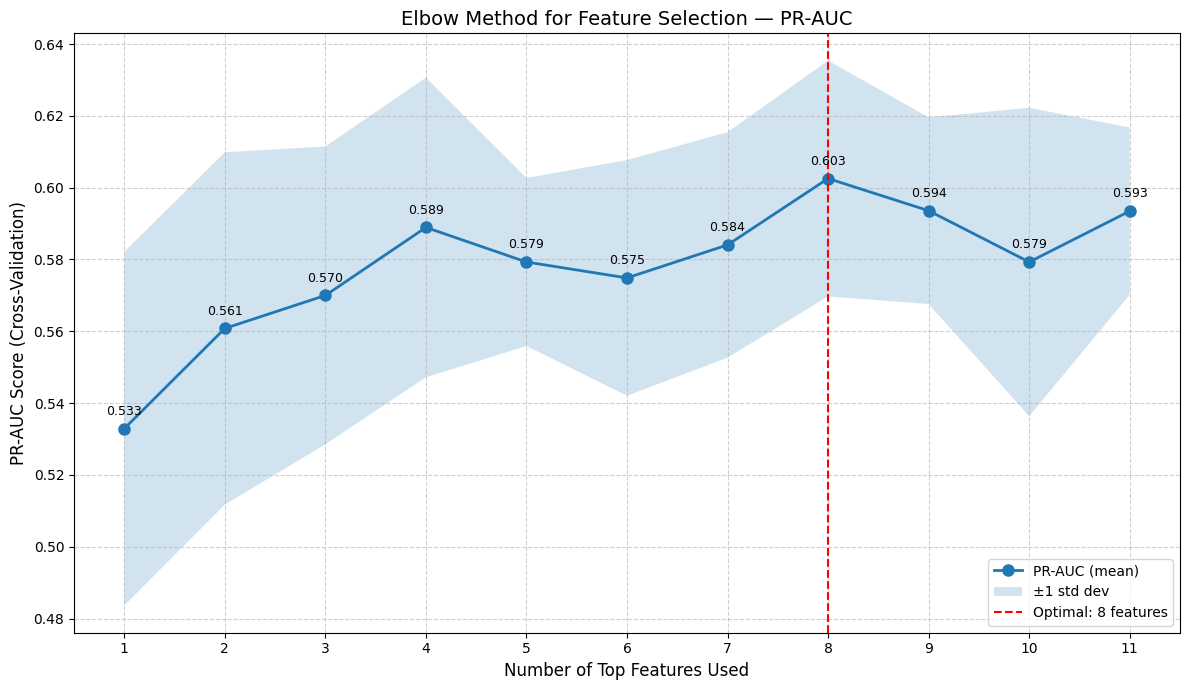


✅ Оптимальное количество признаков: 8
Финальный набор признаков для обучения:
['Glucose_x_BMI', 'Glucose', 'BMI', 'Age_x_BloodPressure', 'DiabetesPedigreeFunction', 'Age', 'Glucose_to_Insulin_Ratio', 'Insulin']


In [35]:
features_count = np.arange(1, len(features_for_cv) + 1)

deltas = np.diff(scores_cv, prepend=0)
optimal_idx = np.argmax(scores_cv)

plt.figure(figsize=(12, 7))

plt.plot(features_count, scores_cv,
         marker='o', markersize=8, linewidth=2,
         label='recall (mean)')

plt.fill_between(features_count,
                 np.array(scores_cv) - np.array(std_scores_cv),
                 np.array(scores_cv) + np.array(std_scores_cv),
                 alpha=0.2, label='±1 std dev')

# Отмечаем точку с максимальным значением метрики
plt.axvline(x=features_count[optimal_idx],
            color='red', linestyle='--', linewidth=1.5,
            label=f'Optimal: {features_count[optimal_idx]} features')

# Добавляем аннотации
for i, (score, std) in enumerate(zip(scores_cv, std_scores_cv)):
    plt.annotate(f'{score:.3f}',
                 (features_count[i], score),
                 textcoords="offset points",
                 xytext=(0, 10), ha='center', fontsize=9)

plt.title('Elbow Method for Feature Selection — PR-AUC', fontsize=14)
plt.xlabel('Number of Top Features Used', fontsize=12)
plt.ylabel(' recall (Cross-Validation)', fontsize=12)
plt.xticks(features_count)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


optimal_number_of_features = features_count[optimal_idx]
final_features = features_for_cv[:optimal_number_of_features]

print(f"\n✅ Оптимальное количество признаков: {optimal_number_of_features}")
print("Финальный набор признаков для обучения:")
print(final_features)

Выберем 3 признака и начнем тюнинг модели на этих трех признаках
- UPD: на 8 признаках

In [41]:

final_features = ['Glucose_x_BMI', 'Glucose', 'BMI', 'Age_x_BloodPressure']
print(f"Используем {len(final_features)} лучших признаков для финального обучения.")
print(final_features)




X_train_final = X_train_scaled[final_features]
X_test_final = X_test_scaled[final_features]


import pandas as pd
import numpy as np
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    make_scorer, roc_auc_score, average_precision_score,
    accuracy_score, precision_score, recall_score, f1_score,
    precision_recall_curve, auc
)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# --- Определяем кастомную метрику и пайплайн ---

def combined_roc_pr_auc_scorer(y_true, y_proba):

    if len(np.unique(y_true)) < 2:
        return 0.5
    pr_auc = average_precision_score(y_true, y_proba)
    roc_auc = roc_auc_score(y_true, y_proba)
    return np.sqrt(pr_auc * roc_auc)

combined_scorer = make_scorer(combined_roc_pr_auc_scorer, needs_proba=True)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

smote_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_dist_rf_smote = {
    'smote__k_neighbors': randint(3, 11),
    'classifier__n_estimators': randint(100, 800),
    'classifier__max_depth': randint(5, 25),
    'classifier__min_samples_split': randint(2, 15),
    'classifier__min_samples_leaf': randint(1, 10),
    'classifier__max_features': ['sqrt', 'log2', 0.5, 0.7],
    'classifier__criterion': ['gini', 'entropy']
}


rand_rf_smote = RandomizedSearchCV(
    estimator=smote_pipeline,
    param_distributions=param_dist_rf_smote,
    n_iter=150,
    scoring=combined_scorer,
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)


rand_rf_smote.fit(X_train_final, y_train)


print("Лучшие параметры:", rand_rf_smote.best_params_)
print("Лучший скор на кросс-валидации (Combined Score):", rand_rf_smote.best_score_)


#  ОЦЕНКА ЛУЧШЕЙ МОДЕЛИ И ПОИСК ОПТИМАЛЬНОГО ПОРОГА
# ==============================================================================
# ОЦЕНКА ЛУЧШЕЙ МОДЕЛИ И ФИНАЛЬНЫЙ ВЫВОД (ГАРАНТИРОВАННО РАБОЧИЙ)
# ==============================================================================

# ... (ваш код до этого момента остается без изменений) ...

# ОЦЕНКА ЛУЧШЕЙ МОДЕЛИ И ПОИСК ОПТИМАЛЬНОГО ПОРОГА
final_smote_model = rand_rf_smote.best_estimator_
y_proba_smote = final_smote_model.predict_proba(X_test_final)[:, 1]
precision_smote, recall_smote, thresholds_smote = precision_recall_curve(y_test, y_proba_smote)
pr_auc_value_smote = auc(recall_smote, precision_smote)
pr_df_smote = pd.DataFrame({'threshold': np.append(thresholds_smote, 1), 'precision': precision_smote, 'recall': recall_smote})
pr_df_smote['f1'] = 2 * (pr_df_smote.precision * pr_df_smote.recall) / (pr_df_smote.precision + pr_df_smote.recall + 1e-7)
candidates_smote = pr_df_smote[pr_df_smote['recall'] >= 0.80]
if not candidates_smote.empty:
    best_threshold_row_smote = candidates_smote.loc[candidates_smote['f1'].idxmax()]
    print("\n✅ (SMOTE) Условие Recall >= 0.80 достижимо.")
else:
    best_threshold_row_smote = pr_df_smote.loc[pr_df_smote['f1'].idxmax()]
    print("\n⚠️ (SMOTE) Не удалось достичь Recall >= 0.80. Выбран порог по макс. F1-score.")
optimal_threshold_smote = best_threshold_row_smote['threshold']
print(f"✅ (SMOTE) Найден оптимальный порог: {optimal_threshold_smote:.4f}")
y_pred_optimized_smote = (y_proba_smote >= optimal_threshold_smote).astype(int)

# --- Формирование финальной таблицы ---

# 1. Создаем DataFrame с результатами ТЕКУЩЕГО запуска
model_name = "Random Forest (FE + SMOTE Optimized)"
current_results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'PR-AUC'])
current_results.loc[model_name] = [
    accuracy_score(y_test, y_pred_optimized_smote),
    precision_score(y_test, y_pred_optimized_smote, zero_division=0), # Добавлена защита от деления на ноль
    recall_score(y_test, y_pred_optimized_smote, zero_division=0),    # Добавлена защита от деления на ноль
    f1_score(y_test, y_pred_optimized_smote, zero_division=0),        # Добавлена защита от деления на ноль
    roc_auc_score(y_test, y_proba_smote),
    pr_auc_value_smote
]

# 2. Проверяем, существует ли comparison_df. Если нет - создаем его.
try:
    # Этот блок нужен, чтобы код не падал при самом первом запуске
    _ = comparison_df
except NameError:
    print("Создан новый DataFrame 'comparison_df' для хранения результатов.")
    comparison_df = pd.DataFrame()

# 3. УДАЛЯЕМ СТАРЫЙ РЕЗУЛЬТАТ, ЕСЛИ ОН ЕСТЬ.
# Это ключевой шаг для предотвращения ошибки.
if model_name in comparison_df.index:
    comparison_df.drop(model_name, inplace=True)
    print(f"Обновлены результаты для модели '{model_name}'.")

# 4. Добавляем новый результат в общую таблицу
comparison_df = pd.concat([comparison_df, current_results])

# 5. Выводим результат. Теперь индекс ГАРАНТИРОВАННО уникален.
print("\n--- Сравнение результатов моделей ---")
display(comparison_df.sort_values(by='PR-AUC', ascending=False).style.background_gradient(cmap='viridis'))

Используем 4 лучших признаков для финального обучения.
['Glucose_x_BMI', 'Glucose', 'BMI', 'Age_x_BloodPressure']
Fitting 5 folds for each of 150 candidates, totalling 750 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


Лучшие параметры: {'classifier__criterion': 'gini', 'classifier__max_depth': 24, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 14, 'classifier__n_estimators': 120, 'smote__k_neighbors': 9}
Лучший скор на кросс-валидации (Combined Score): nan

✅ (SMOTE) Условие Recall >= 0.80 достижимо.
✅ (SMOTE) Найден оптимальный порог: 0.3937
Обновлены результаты для модели 'Random Forest (FE + SMOTE Optimized)'.

--- Сравнение результатов моделей ---


,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC
Random Forest (FE + SMOTE Optimized),0.720779,0.571429,0.814815,0.671756,0.794259,0.636335


In [42]:

final_features = ['Glucose_x_BMI', 'Glucose', 'BMI', 'Age_x_BloodPressure', 'DiabetesPedigreeFunction', 'Age', 'Glucose_to_Insulin_Ratio', 'Insulin']
print(f"Используем {len(final_features)} лучших признаков для финального обучения.")
print(final_features)




X_train_final = X_train_scaled[final_features]
X_test_final = X_test_scaled[final_features]


import pandas as pd
import numpy as np
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    make_scorer, roc_auc_score, average_precision_score,
    accuracy_score, precision_score, recall_score, f1_score,
    precision_recall_curve, auc
)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# --- Определяем кастомную метрику и пайплайн ---

def combined_roc_pr_auc_scorer(y_true, y_proba):

    if len(np.unique(y_true)) < 2:
        return 0.5
    pr_auc = average_precision_score(y_true, y_proba)
    roc_auc = roc_auc_score(y_true, y_proba)
    return np.sqrt(pr_auc * roc_auc)

combined_scorer = make_scorer(combined_roc_pr_auc_scorer, needs_proba=True)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

smote_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_dist_rf_smote = {
    'smote__k_neighbors': randint(3, 11),
    'classifier__n_estimators': randint(100, 800),
    'classifier__max_depth': randint(5, 25),
    'classifier__min_samples_split': randint(2, 15),
    'classifier__min_samples_leaf': randint(1, 10),
    'classifier__max_features': ['sqrt', 'log2', 0.5, 0.7],
    'classifier__criterion': ['gini', 'entropy']
}


rand_rf_smote = RandomizedSearchCV(
    estimator=smote_pipeline,
    param_distributions=param_dist_rf_smote,
    n_iter=150,
    scoring=combined_scorer,
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)


rand_rf_smote.fit(X_train_final, y_train)


print("Лучшие параметры:", rand_rf_smote.best_params_)
print("Лучший скор на кросс-валидации (Combined Score):", rand_rf_smote.best_score_)


#  ОЦЕНКА ЛУЧШЕЙ МОДЕЛИ И ПОИСК ОПТИМАЛЬНОГО ПОРОГА
# ==============================================================================
# ОЦЕНКА ЛУЧШЕЙ МОДЕЛИ И ФИНАЛЬНЫЙ ВЫВОД (ГАРАНТИРОВАННО РАБОЧИЙ)
# ==============================================================================

# ... (ваш код до этого момента остается без изменений) ...

# ОЦЕНКА ЛУЧШЕЙ МОДЕЛИ И ПОИСК ОПТИМАЛЬНОГО ПОРОГА
final_smote_model = rand_rf_smote.best_estimator_
y_proba_smote = final_smote_model.predict_proba(X_test_final)[:, 1]
precision_smote, recall_smote, thresholds_smote = precision_recall_curve(y_test, y_proba_smote)
pr_auc_value_smote = auc(recall_smote, precision_smote)
pr_df_smote = pd.DataFrame({'threshold': np.append(thresholds_smote, 1), 'precision': precision_smote, 'recall': recall_smote})
pr_df_smote['f1'] = 2 * (pr_df_smote.precision * pr_df_smote.recall) / (pr_df_smote.precision + pr_df_smote.recall + 1e-7)
candidates_smote = pr_df_smote[pr_df_smote['recall'] >= 0.80]
if not candidates_smote.empty:
    best_threshold_row_smote = candidates_smote.loc[candidates_smote['f1'].idxmax()]
    print("\n✅ (SMOTE) Условие Recall >= 0.80 достижимо.")
else:
    best_threshold_row_smote = pr_df_smote.loc[pr_df_smote['f1'].idxmax()]
    print("\n⚠️ (SMOTE) Не удалось достичь Recall >= 0.80. Выбран порог по макс. F1-score.")
optimal_threshold_smote = best_threshold_row_smote['threshold']
print(f"✅ (SMOTE) Найден оптимальный порог: {optimal_threshold_smote:.4f}")
y_pred_optimized_smote = (y_proba_smote >= optimal_threshold_smote).astype(int)

# --- Формирование финальной таблицы ---

# 1. Создаем DataFrame с результатами ТЕКУЩЕГО запуска
model_name = "Random Forest (FE + SMOTE Optimized)"
current_results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'PR-AUC'])
current_results.loc[model_name] = [
    accuracy_score(y_test, y_pred_optimized_smote),
    precision_score(y_test, y_pred_optimized_smote, zero_division=0), # Добавлена защита от деления на ноль
    recall_score(y_test, y_pred_optimized_smote, zero_division=0),    # Добавлена защита от деления на ноль
    f1_score(y_test, y_pred_optimized_smote, zero_division=0),        # Добавлена защита от деления на ноль
    roc_auc_score(y_test, y_proba_smote),
    pr_auc_value_smote
]

# 2. Проверяем, существует ли comparison_df. Если нет - создаем его.
try:
    # Этот блок нужен, чтобы код не падал при самом первом запуске
    _ = comparison_df
except NameError:
    print("Создан новый DataFrame 'comparison_df' для хранения результатов.")
    comparison_df = pd.DataFrame()

# 3. УДАЛЯЕМ СТАРЫЙ РЕЗУЛЬТАТ, ЕСЛИ ОН ЕСТЬ.
# Это ключевой шаг для предотвращения ошибки.
if model_name in comparison_df.index:
    comparison_df.drop(model_name, inplace=True)
    print(f"Обновлены результаты для модели '{model_name}'.")

# 4. Добавляем новый результат в общую таблицу
comparison_df = pd.concat([comparison_df, current_results])

# 5. Выводим результат. Теперь индекс ГАРАНТИРОВАННО уникален.
print("\n--- Сравнение результатов моделей ---")
display(comparison_df.sort_values(by='PR-AUC', ascending=False).style.background_gradient(cmap='viridis'))

Используем 8 лучших признаков для финального обучения.
['Glucose_x_BMI', 'Glucose', 'BMI', 'Age_x_BloodPressure', 'DiabetesPedigreeFunction', 'Age', 'Glucose_to_Insulin_Ratio', 'Insulin']
Fitting 5 folds for each of 150 candidates, totalling 750 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


Лучшие параметры: {'classifier__criterion': 'gini', 'classifier__max_depth': 24, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 14, 'classifier__n_estimators': 120, 'smote__k_neighbors': 9}
Лучший скор на кросс-валидации (Combined Score): nan

✅ (SMOTE) Условие Recall >= 0.80 достижимо.
✅ (SMOTE) Найден оптимальный порог: 0.2485
Обновлены результаты для модели 'Random Forest (FE + SMOTE Optimized)'.

--- Сравнение результатов моделей ---


,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC
Random Forest (FE + SMOTE Optimized),0.714286,0.555556,0.925926,0.694444,0.823333,0.706019
